In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = "../../Weather Station Data/Llanganuco_PORTWX_17Jul06_28Jun14.csv"
df = pd.read_csv(f, encoding="latin1")


In [38]:


# Carregar e preparar os dados (substitua pelo seu DataFrame real)
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%m/%d/%Y %H:%M')

# Remover duplicatas (caso existam) mantendo a primeira ocorrência
df = df.drop_duplicates(subset=['Datetime'])

# Determinar o intervalo de anos
start_year = df['Datetime'].min().year
end_year = df['Datetime'].max().year

# Criar o intervalo completo de datas para os anos inteiros
full_date_range = pd.date_range(
    start=f'{start_year}-01-01', 
    end=f'{end_year}-12-31', 
    freq='D'
)

# Reindexar o DataFrame para o intervalo completo de datas
df_full = df.set_index('Datetime').reindex(full_date_range)



PRECIPITAÇÃO

In [39]:
# Certifique-se de que o índice esteja no formato datetime
df_full.index = pd.to_datetime(df_full.index)

# Criar uma série com o ano a partir do índice
df_full['Year'] = df_full.index.year

# Contar valores NaN para cada ano
nan_count_by_year = df_full.groupby('Year')['Precipitation (mm)'].apply(lambda x: x.isna().sum())

# Contar o total de valores para cada ano
total_count_by_year = df_full.groupby('Year')['Precipitation (mm)'].size()

# Calcular o percentual de NaN para cada ano
nan_percentage_by_year = (nan_count_by_year / total_count_by_year) * 100

# Exibir resultados
for year in nan_count_by_year.index:
    print(f"Ano: {year}")
    print(f"Quantidade de valores NaN: {nan_count_by_year[year]}")
    print(f"Percentual de valores NaN: {nan_percentage_by_year[year]:.2f}%\n")



Ano: 2006
Quantidade de valores NaN: 199
Percentual de valores NaN: 54.52%

Ano: 2007
Quantidade de valores NaN: 128
Percentual de valores NaN: 35.07%

Ano: 2008
Quantidade de valores NaN: 32
Percentual de valores NaN: 8.74%

Ano: 2009
Quantidade de valores NaN: 65
Percentual de valores NaN: 17.81%

Ano: 2010
Quantidade de valores NaN: 0
Percentual de valores NaN: 0.00%

Ano: 2011
Quantidade de valores NaN: 0
Percentual de valores NaN: 0.00%

Ano: 2012
Quantidade de valores NaN: 178
Percentual de valores NaN: 48.63%

Ano: 2013
Quantidade de valores NaN: 180
Percentual de valores NaN: 49.32%

Ano: 2014
Quantidade de valores NaN: 186
Percentual de valores NaN: 50.96%



In [40]:
# Contador de valores ausentes para Precipitation (mm)
nan_count_precipitation = df_full['Precipitation (mm)'].isna().sum()

# Total de valores no intervalo completo de datas
total_count = df_full['Precipitation (mm)'].size

# Percentual de NaN
nan_percentage_precipitation = (nan_count_precipitation / total_count) * 100

# Exibir resultados
print(f"A quantidade de valores NaN na coluna 'Precipitation (mm)' é: {nan_count_precipitation}")
print(f"Os valores NaN representam {nan_percentage_precipitation:.2f}% do total de dados na coluna 'Precipitation (mm)'.")


A quantidade de valores NaN na coluna 'Precipitation (mm)' é: 968
Os valores NaN representam 29.45% do total de dados na coluna 'Precipitation (mm)'.


In [41]:
df

,Datetime,Wind Speed (m/s),Wind Direction (°),Air Temperature (°C),Dew Point (°C),RH (%),Surface Temperature (°C),Solar (Wm-2),Precipitation (mm)
0,2006-07-17 10:00:00,NaN,NaN,17.0,4.2,42.5,NaN,NaN,NaN
1,2006-07-17 11:00:00,NaN,NaN,21.5,7.5,40.5,NaN,NaN,NaN
2,2006-07-17 12:00:00,NaN,NaN,25.0,8.9,36.0,NaN,NaN,NaN
3,2006-07-17 13:00:00,NaN,NaN,18.5,4.5,39.5,NaN,NaN,NaN
4,2006-07-17 14:00:00,NaN,NaN,32.5,12.4,29.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
68133,2014-06-28 07:00:00,6.5,135.5,NaN,NaN,NaN,NaN,3.0,0.0
68134,2014-06-28 08:00:00,5.4,139.0,NaN,NaN,NaN,NaN,79.3,0.0
68135,2014-06-28 09:00:00,4.4,143.9,NaN,NaN,NaN,NaN,171.0,0.0
68136,2014-06-28 10:00:00,5.0,141.8,NaN,NaN,NaN,NaN,631.8,0.0


TEMPERATURA

In [42]:
# Certifique-se de que o índice esteja no formato datetime
df_full.index = pd.to_datetime(df_full.index)

# Criar uma série com o ano a partir do índice
df_full['Year'] = df_full.index.year

# Contar valores NaN para cada ano
nan_count_by_year = df_full.groupby('Year')['Air Temperature (°C)'].apply(lambda x: x.isna().sum())

# Contar o total de valores para cada ano
total_count_by_year = df_full.groupby('Year')['Air Temperature (°C)'].size()

# Calcular o percentual de NaN para cada ano
nan_percentage_by_year = (nan_count_by_year / total_count_by_year) * 100

# Exibir resultados
for year in nan_count_by_year.index:
    print(f"Ano: {year}")
    print(f"Quantidade de valores NaN: {nan_count_by_year[year]}")
    print(f"Percentual de valores NaN: {nan_percentage_by_year[year]:.2f}%\n")


Ano: 2006
Quantidade de valores NaN: 198
Percentual de valores NaN: 54.25%

Ano: 2007
Quantidade de valores NaN: 0
Percentual de valores NaN: 0.00%

Ano: 2008
Quantidade de valores NaN: 0
Percentual de valores NaN: 0.00%

Ano: 2009
Quantidade de valores NaN: 169
Percentual de valores NaN: 46.30%

Ano: 2010
Quantidade de valores NaN: 0
Percentual de valores NaN: 0.00%

Ano: 2011
Quantidade de valores NaN: 0
Percentual de valores NaN: 0.00%

Ano: 2012
Quantidade de valores NaN: 339
Percentual de valores NaN: 92.62%

Ano: 2013
Quantidade de valores NaN: 365
Percentual de valores NaN: 100.00%

Ano: 2014
Quantidade de valores NaN: 365
Percentual de valores NaN: 100.00%



In [43]:
# Contador de valores ausentes para Temperature (°C)
nan_count_temperature = df_full['Air Temperature (°C)'].isna().sum()

# Percentual de NaN para Temperature (°C)
nan_percentage_temperature = (nan_count_temperature / total_count) * 100

# Exibir resultados para Temperature (°C)
print(f"A quantidade de valores NaN na coluna 'Temperature (°C)' é: {nan_count_temperature}")
print(f"Os valores NaN representam {nan_percentage_temperature:.2f}% do total de dados na coluna 'Temperature (°C)'.")


A quantidade de valores NaN na coluna 'Temperature (°C)' é: 1436
Os valores NaN representam 43.69% do total de dados na coluna 'Temperature (°C)'.


GRÁFICOS

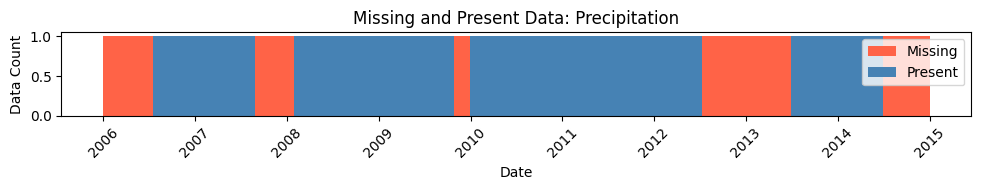

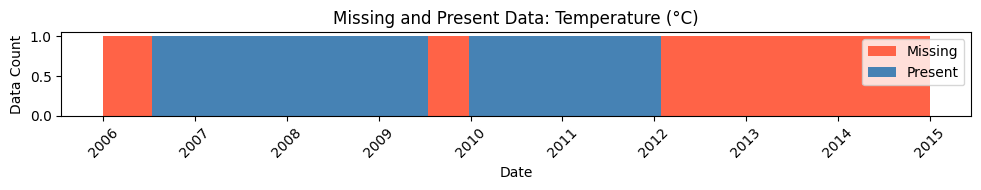

In [44]:

# Verificar as datas ausentes e presentes para Precipitation e Temperature (°C)
missing_precipitation = df_full['Precipitation (mm)'].isna()
present_precipitation = ~missing_precipitation

missing_temperature = df_full['Air Temperature (°C)'].isna()
present_temperature = ~missing_temperature

bar_width = 5  # Ajuste fino da largura da barra

# Gráfico para Precipitation
plt.figure(figsize=(10, 2))
plt.bar(df_full.index[missing_precipitation], np.ones(missing_precipitation.sum()), 
        color='tomato', label='Missing', width=bar_width)  # Missing data in red
plt.bar(df_full.index[present_precipitation], np.ones(present_precipitation.sum()), 
        color='steelblue', label='Present', width=bar_width)  # Present data in blue
plt.title('Missing and Present Data: Precipitation')
plt.ylabel('Data Count')
plt.xlabel('Date')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico para Temperature (°C)
plt.figure(figsize=(10, 2))
plt.bar(df_full.index[missing_temperature], np.ones(missing_temperature.sum()), 
        color='tomato', label='Missing', width=bar_width)  # Missing data in red
plt.bar(df_full.index[present_temperature], np.ones(present_temperature.sum()), 
        color='steelblue', label='Present', width=bar_width)  # Present data in blue
plt.title('Missing and Present Data: Temperature (°C)')
plt.ylabel('Data Count')
plt.xlabel('Date')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
